In [2]:
import pandas as pd
import numpy as np

def weight_func(sequence):
    prob = []
    cum_prob = []
    total_sum = sum(sequence)
    uniform = np.random.uniform(0,1)

    for i in range(len(sequence)):
        prob.append(sequence[i]/total_sum)
        cum_prob.append(sum(prob))
        if uniform < cum_prob[i]:
            break

        return sequence[i]

In [3]:
np.random.seed(123)

def some_funct(number_trials, probability_A):
    binomial_dist = np.random.binomial(n=number_trials, p=probability_A, size=10000)
    count = 0
    for value in binomial_dist:
        if value > 6050:
            count += 1

    return count/number_trials
some_funct(number_trials=10000, probability_A=0.6)

0.1498

## Power Analysis

In [4]:
from statsmodels.stats.power import TTestIndPower

effect = 0.1
alpha = 0.05
power = 0.8

analysis = TTestIndPower()
result = analysis.solve_power(effect, power=power, nobs1=None, ratio = 1.0, alpha=alpha)
print('Sample Size: %.3f' % round(result))

Sample Size: 1571.000


/Users/harveyjiang/anaconda3/lib/python3.11/site-packages/scipy/stats/_continuous_distns.py:6832: RuntimeWarning: invalid value encountered in _nct_sf
  return np.clip(_boost._nct_sf(x, df, nc), 0, 1)
/Users/harveyjiang/anaconda3/lib/python3.11/site-packages/scipy/stats/_continuous_distns.py:6826: RuntimeWarning: invalid value encountered in _nct_cdf
  return np.clip(_boost._nct_cdf(x, df, nc), 0, 1)
/Users/harveyjiang/anaconda3/lib/python3.11/site-packages/scipy/stats/_continuous_distns.py:6832: RuntimeWarning: overflow encountered in _nct_sf
  return np.clip(_boost._nct_sf(x, df, nc), 0, 1)
/Users/harveyjiang/anaconda3/lib/python3.11/site-packages/scipy/stats/_continuous_distns.py:6826: RuntimeWarning: overflow encountered in _nct_cdf
  return np.clip(_boost._nct_cdf(x, df, nc), 0, 1)


## Data Generation Process with simulation

In [5]:
# userid

user_id_control = list(range(1,1601))
user_id_treatment = list(range(1601,3350))

In [6]:
# Version
control_status = ['control']*1600
treatment_status = ['treatment']*1749

In [7]:
# Variable 3: minutes of plays, which has normal distribution with central limit theroem
# Control group
u_1 = 30
var_1 = 10
np.random.seed(123)
minutes_control = np.random.normal(loc = u_1, scale=var_1, size = 1600)

In [10]:
# Treatment group
# (u_2 - u_1)/var = 0.1
u_2 = u_1 + 0.1*var_1
var_2 = 10
np.random.seed(123)
minutes_treat = np.random.normal(loc=u_2, scale=var_2, size = 1749)

In [11]:
# Variable 4 user engagement after 1 day
# after day 1, simulate novelty effect

Active_status = [True, False]

# control
day_1_control = np.random.choice(Active_status, 1600, p=[0.3, 0.7])

# treatment
day_1_treatment = np.random.choice(Active_status, 1749, p=[0.35, 0.65])


In [12]:
# Variable 5, user engagement after 7 day
# after day 7, control > treatment, novelty effect diminished and revered

# control
day_7_control = np.random.choice(Active_status, 1600, p=[0.35, 0.65])

# treatment
day_7_treatment = np.random.choice(Active_status, 1749, p=[0.25, 0.75])

## Construct control group

In [23]:
raw_control = {'user_id':user_id_control,
               'version':control_status,
               'minutes_play':minutes_control,
               'day_1_active':day_1_control,
               'day_7_active':day_7_control
               }
control_group = pd.DataFrame(data=raw_control)
control_group

,user_id,version,minutes_play,day_1_active,day_7_active
0,1,control,19.143694,False,True
1,2,control,39.973454,True,False
2,3,control,32.829785,False,False
3,4,control,14.937053,False,True
4,5,control,24.213997,False,True
...,...,...,...,...,...
1595,1596,control,27.154466,False,True
1596,1597,control,46.414042,True,False
1597,1598,control,41.523560,True,True
1598,1599,control,23.981909,False,True


In [24]:
## Contrust treatment group

In [25]:
raw_treatment = {'user_id':user_id_treatment,
               'version':treatment_status,
               'minutes_play':minutes_treat,
               'day_1_active':day_1_treatment,
               'day_7_active':day_7_treatment
               }
treatment_group = pd.DataFrame(data=raw_treatment)
treatment_group

,user_id,version,minutes_play,day_1_active,day_7_active
0,1601,treatment,20.143694,False,False
1,1602,treatment,40.973454,True,False
2,1603,treatment,33.829785,True,True
3,1604,treatment,15.937053,False,False
4,1605,treatment,25.213997,False,True
...,...,...,...,...,...
1744,3345,treatment,23.053563,False,False
1745,3346,treatment,21.755798,False,True
1746,3347,treatment,45.081771,True,True
1747,3348,treatment,37.187168,True,True


In [26]:
two_datasets = control_group.append(treatment_group)

final_data = two_datasets.sample(frac=1)

/var/folders/pr/9_2s18ld0_d38x14xrf468fh0000gn/T/ipykernel_71223/1717605067.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  two_datasets = control_group.append(treatment_group)


In [27]:
final_data

,user_id,version,minutes_play,day_1_active,day_7_active
1335,1336,control,35.746214,True,False
1031,1032,control,41.911893,True,False
953,954,control,36.501549,False,True
1549,3150,treatment,21.765848,False,False
671,672,control,15.180415,False,True
...,...,...,...,...,...
308,1909,treatment,34.426380,False,False
641,2242,treatment,21.799069,False,True
1109,1110,control,31.523398,False,False
409,2010,treatment,39.501029,False,True


## After test data analysis

In [28]:
# count number of users in each version
final_data.groupby('version')['user_id'].count()

version
control      1600
treatment    1749
Name: user_id, dtype: int64

## Testing for Sample Ratio Mismatch

In [39]:
# Chi-square test
from scipy.stats import chisquare
chi = chisquare([1600,1749],f_exp = [1674.5,1674.5])
print(chi)


Power_divergenceResult(statistic=6.629143027769484, pvalue=0.01003235193083798)


In [38]:
# set alpha = 0.01 for SRM.
if chi[1] < 0.01:
    print('Reject the null, SRM is present')
else:
    print('Fail to reject the null, No SRM')

No SRM


Text(0, 0.5, 'User Count')

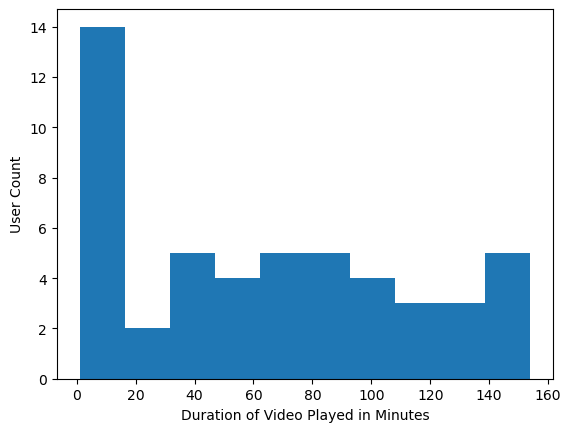

In [41]:
%matplotlib inline

final_data['minutes_play_integers'] = round(final_data['minutes_play'])
plot_df = final_data.groupby('minutes_play_integers')['user_id'].count()
ax = plot_df.head(n=50).plot(x="minutes_play_integers", y="user_id", kind="hist")
ax.set_xlabel("Duration of Video Played in Minutes")
ax.set_ylabel("User Count")

In [42]:
## Metric 1 - Day 1 retention
final_data['day_1_active'].mean()

0.32218572708271126

In [43]:
final_data.groupby('version')['day_1_active'].mean()

version
control      0.293125
treatment    0.348771
Name: day_1_active, dtype: float64

<Axes: ylabel='Density'>

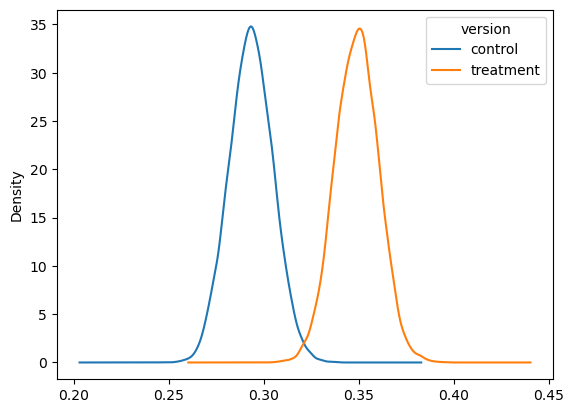

In [44]:
# Bootstrap
boot_means = []

for i in range(10000):
    boot_sample = final_data.sample(frac=1, replace=True).groupby('version')['day_1_active'].mean()
    boot_means.append(boot_sample)

boot_means = pd.DataFrame(boot_means)

boot_means.plot(kind='kde')

In [45]:
boot_means['diff'] = (boot_means['treatment'] - boot_means['control'])/boot_means['control']*100
boot_means['diff']


day_1_active    22.401355
day_1_active    22.424503
day_1_active    16.454318
day_1_active    17.679082
day_1_active    12.462930
                  ...    
day_1_active    26.086403
day_1_active    16.431710
day_1_active    13.877429
day_1_active    17.249551
day_1_active    26.790021
Name: diff, Length: 10000, dtype: float64

Text(0.5, 0, '% diff in means')

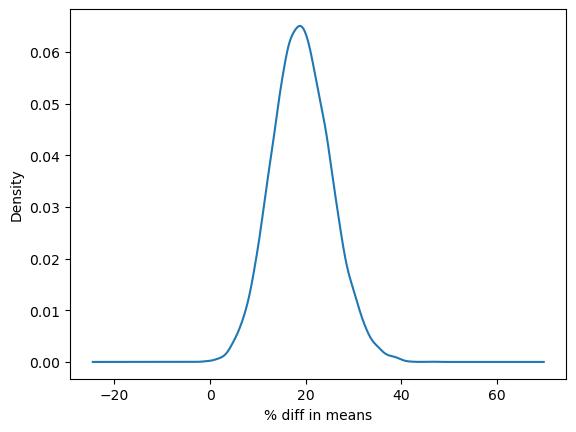

In [46]:
ax = boot_means['diff'].plot(kind = 'kde')
ax.set_xlabel("% diff in means")

In [47]:
boot_means[boot_means['diff'] > 0]


version,control,treatment,diff
day_1_active,0.287492,0.351894,22.401355
day_1_active,0.299937,0.367196,22.424503
day_1_active,0.309335,0.360234,16.454318
day_1_active,0.285805,0.336333,17.679082
day_1_active,0.301768,0.339377,12.462930
...,...,...,...
day_1_active,0.292008,0.368182,26.086403
day_1_active,0.299252,0.348424,16.431710
day_1_active,0.299938,0.341561,13.877429
day_1_active,0.302915,0.355167,17.249551


In [48]:
# p value 
p = (boot_means['diff'] >0).sum()/len(boot_means)
p

0.9997